# Support Vector Machine

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. 

It works by finding a hyperplane that best separates the data points of different classes while maximizing the margin between them. 

SVM is particularly effective when dealing with complex decision boundaries and high-dimensional data.

### EDA on Social_Network_Ads Dataset

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset

df = pd.read_csv("Social_Network_Ads.csv")
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [3]:
# Check the dimensions of dataset

df.shape

(400, 3)

In [4]:
# Check data types of each column

df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [5]:
# Check for missing values

df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There are no null values

In [6]:
# Check for duplicate values

df.duplicated().sum()

33

In [7]:
# Removing duplicate values

df = df.drop_duplicates()

In [8]:
# Calculate summary statistics

df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


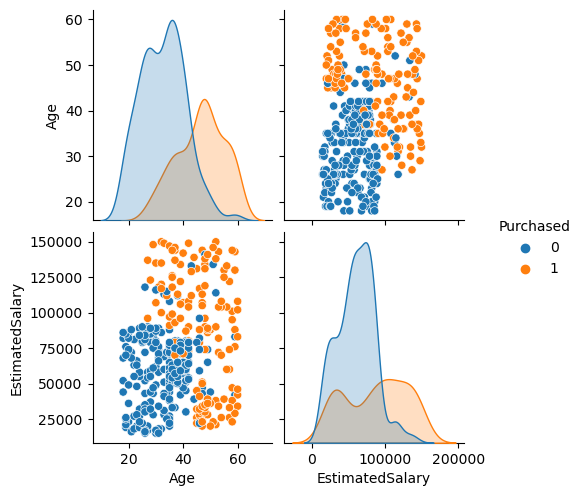

In [9]:
# Pairplot to visualize relationships between numeric variables

sns.pairplot(df, hue="Purchased")
plt.show()

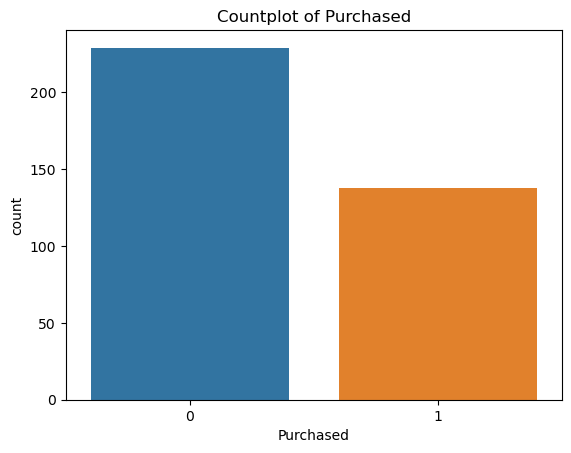

In [10]:
# Countplot for Purchased

sns.countplot(x="Purchased", data=df)
plt.title("Countplot of Purchased")
plt.show()

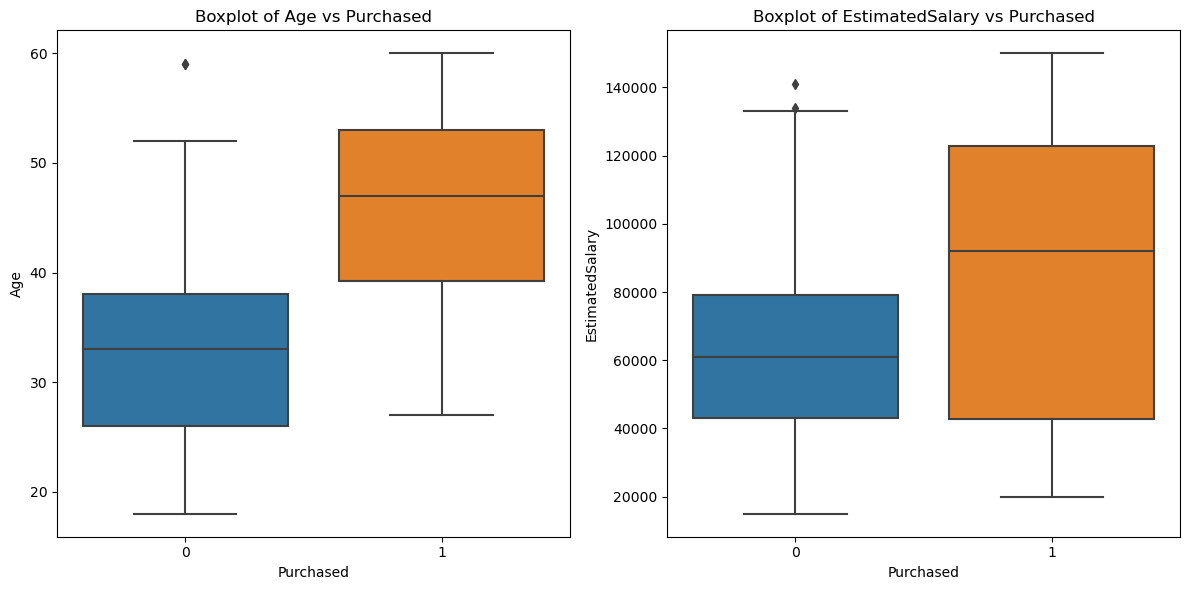

In [11]:
# Data Visualization using subplots

plt.figure(figsize=(12,6))

# Boxplot for Age vs Purchased
plt.subplot(1, 2, 1)
sns.boxplot(x="Purchased", y="Age", data=df)
plt.title("Boxplot of Age vs Purchased")

# Boxplot for EstimatedSalary vs Purchased
plt.subplot(1, 2, 2)
sns.boxplot(x="Purchased", y="EstimatedSalary", data=df)
plt.title("Boxplot of EstimatedSalary vs Purchased")

plt.tight_layout()
plt.show()


### Building the Support Vector Classifier Model

In [12]:
# Select features and target variable

X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [13]:
# Importing the necessary libraries to build a model

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [14]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Standardize features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Create an SVM classifier with a linear kernel

classifier = SVC(kernel='linear', C=1.0)

In [17]:
# Train the classifier

classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [18]:
# Make predictions on the test data

y_pred = classifier.predict(X_test_scaled)
print(y_pred)

[1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0
 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0]


In [19]:
# Comparing the results

comparision = pd.DataFrame()
comparision['Actual'] = y_test
comparision['predicted'] = y_pred
comparision.head(10)

,Actual,predicted
204,1,1
34,0,0
15,0,0
334,1,1
59,0,0
191,0,0
79,0,0
124,0,0
159,1,0
131,0,0


In [20]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8695652173913043

Confusion Matrix:
 [[51  5]
 [ 7 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        56
           1       0.85      0.81      0.83        36

    accuracy                           0.87        92
   macro avg       0.87      0.86      0.86        92
weighted avg       0.87      0.87      0.87        92



The SVM classifier performed reasonably well, achieving an accuracy of approximately 87%. 

The model appears to have balanced precision and recall scores for both classes, indicating a reasonable performance in classifying both positive and negative cases. 

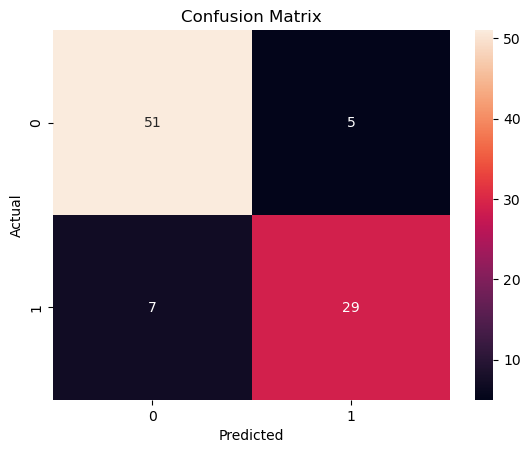

In [21]:
# Visualizing the confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Assume you have a new_data array with features "Age" and "EstimatedSalary"

new_data = [[100, 125141]] 

# Standardize the new data using the same scaler as used during training
new_data_scaled = scaler.transform(new_data)

# Use the trained classifier to predict the class label
predicted_class = classifier.predict(new_data_scaled)

print("Predicted Class:", predicted_class[0])
# Predicting with new_data array with features "Age" and "EstimatedSalary"

Predicted Class: 1


In [23]:
new_data = [[50, 40000]]
for i in range(10):
    new_data_scaled = scaler.transform(new_data)
    predicted_class = classifier.predict(new_data_scaled)
    print("Predicted Class for New_data {} is:   {}".format(new_data, predicted_class[0]))
    new_data = [[new_data[0][0] + 5, new_data[0][1] + 5000]]  # Update each feature by 5 and 5000

Predicted Class for New_data [[50, 40000]] is:   1
Predicted Class for New_data [[55, 45000]] is:   1
Predicted Class for New_data [[60, 50000]] is:   1
Predicted Class for New_data [[65, 55000]] is:   1
Predicted Class for New_data [[70, 60000]] is:   1
Predicted Class for New_data [[75, 65000]] is:   1
Predicted Class for New_data [[80, 70000]] is:   1
Predicted Class for New_data [[85, 75000]] is:   1
Predicted Class for New_data [[90, 80000]] is:   1
Predicted Class for New_data [[95, 85000]] is:   1
